# KMeans Clustering

> ## K-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

> * ## The "cluster center" is the arithmetic mean of all the points beloging to the cluster.
> * ## Each point is closer to its own cluster center than to other cluster centers.

> ## Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-mean result.

In [1]:
# importing libraries

from sklearn.cluster import KMeans

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import pandas as pd

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("data-income-age-group.csv")

In [7]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


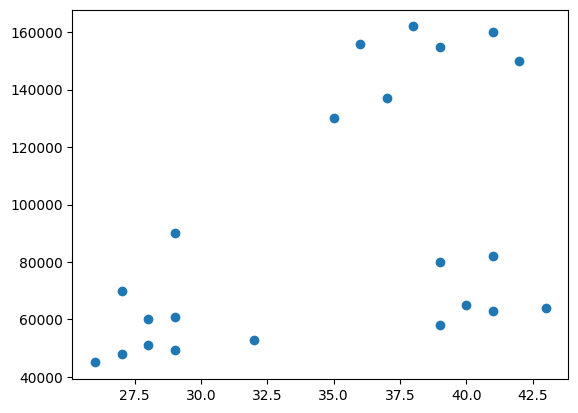

In [8]:
plt.scatter(df.Age, df['Income($)'])

Text(0, 0.5, 'Income($)')

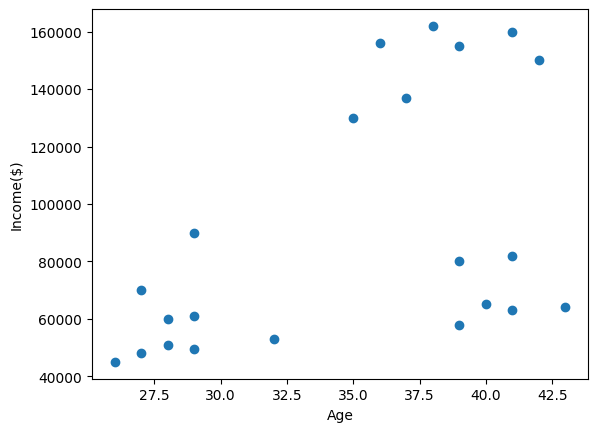

In [10]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [11]:
# set clusters

km = KMeans(n_clusters=3)

In [12]:
km

KMeans(n_clusters=3)

In [13]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

C:\Users\Harsh LogicRays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [15]:
df['cluster'] = y_predicted

In [16]:
df

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [17]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04],
       [3.29090909e+01, 5.61363636e+04]])

In [18]:
df.cluster

0     1
1     1
2     2
3     2
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    2
12    2
13    2
14    2
15    2
16    2
17    2
18    2
19    1
20    1
21    2
Name: cluster, dtype: int32

In [19]:
df[df.cluster==0]

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


In [20]:
df_1 = df[df.cluster==0]

In [21]:
df_2 = df[df.cluster==1]

In [22]:
df_3 = df[df.cluster==2]

In [23]:
df_2

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
19,Alia,39,80000,1
20,Sid,41,82000,1


In [24]:
df_3

,Name,Age,Income($),cluster
2,Mohan,29,61000,2
3,Ismail,28,60000,2
11,Tom,26,45000,2
12,Arnold,27,48000,2
13,Jared,28,51000,2
14,Stark,29,49500,2
15,Ranbir,32,53000,2
16,Dipika,40,65000,2
17,Priyanka,41,63000,2
18,Nick,43,64000,2


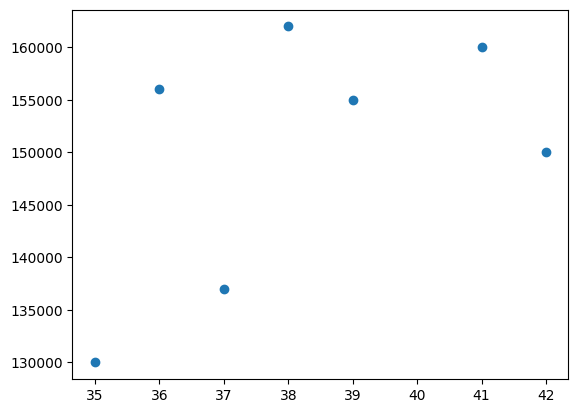

In [25]:
plt.scatter(df_1.Age, df_1['Income($)'])

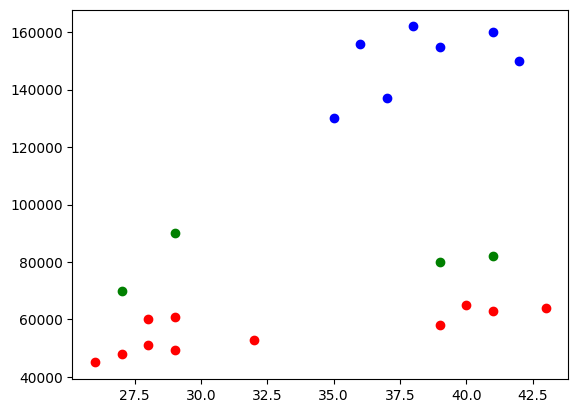

In [26]:
plt.scatter(df_1.Age, df_1['Income($)'], color='blue')
plt.scatter(df_2.Age, df_2['Income($)'], color='green')
plt.scatter(df_3.Age, df_3['Income($)'], color='red')

In [28]:
km.cluster_centers_[:,0]

array([38.28571429, 34.        , 32.90909091])

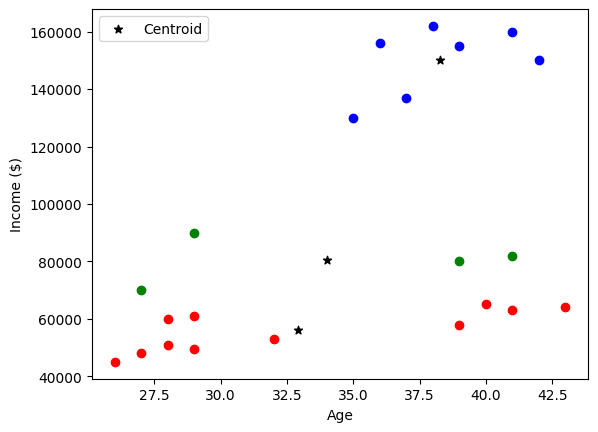

In [29]:
plt.scatter(df_1.Age, df_1['Income($)'], color='blue')
plt.scatter(df_2.Age, df_2['Income($)'], color='green')
plt.scatter(df_3.Age, df_3['Income($)'], color='red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="black", marker="*", label="Centroid")
# labeling
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

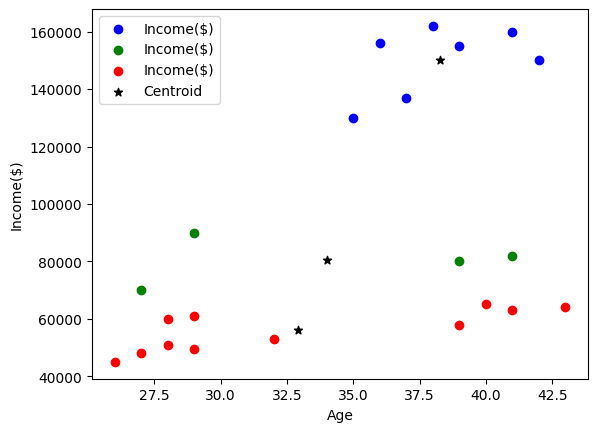

In [39]:
df_1 = df[df.cluster==0]
df_2 = df[df.cluster==1]
df_3 = df[df.cluster==2]
plt.scatter(df_1.Age, df_1['Income($)'], color='blue')
plt.scatter(df_2.Age, df_2['Income($)'], color='green')
plt.scatter(df_3.Age, df_3['Income($)'], color='red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color="black", marker="*", label="Centroid")
# labeling
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(['Income($)', 'Income($)', 'Income($)', 'Centroid'])

In [40]:
# preprocessing - minmax scaler


mm_scaler = MinMaxScaler()

In [41]:
# transform 'Income($)'

mm_scaler.fit(df[['Income($)']])

MinMaxScaler()

In [42]:
df['Income($)'] = mm_scaler.transform(df[['Income($)']])

In [43]:
# transform 'Age'

mm_scaler.fit(df[['Age']])

MinMaxScaler()

In [44]:
df['Age'] = mm_scaler.transform(df[['Age']])

In [45]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


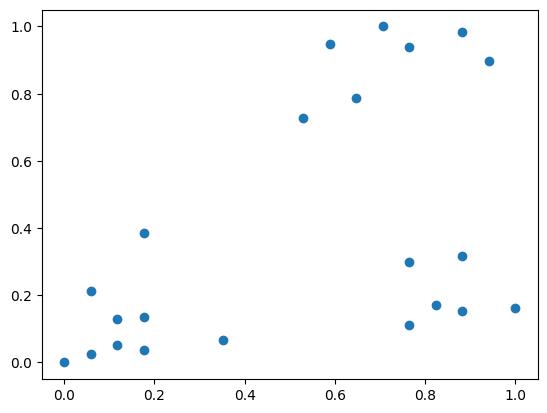

In [46]:
plt.scatter(df.Age, df['Income($)'])

In [47]:
km = KMeans(n_clusters=3)

In [48]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

C:\Users\Harsh LogicRays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [50]:
df['cluster'] = y_predicted

In [51]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [52]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

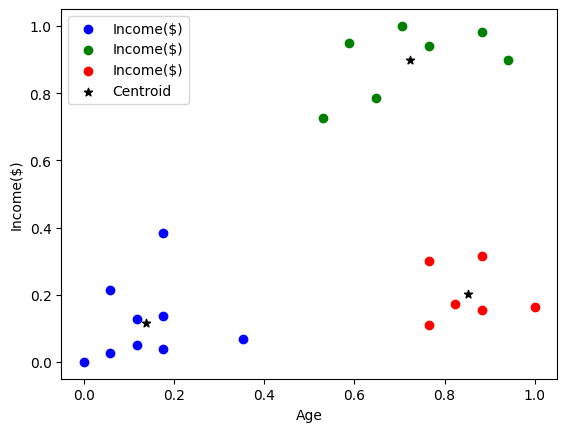

In [54]:
df_1 = df[df.cluster==0]
df_2 = df[df.cluster==1]
df_3 = df[df.cluster==2]

plt.scatter(df_1.Age, df_1['Income($)'], color='blue')
plt.scatter(df_2.Age, df_2['Income($)'], color='green')
plt.scatter(df_3.Age, df_3['Income($)'], color='red')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroid')
# labeling
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend(['Income($)', 'Income($)', 'Income($)', 'Centroid'])

In [55]:
# inertia_

sse = []

for k_value in range(1, 6):
    km = KMeans(n_clusters=k_value)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

C:\Users\Harsh LogicRays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harsh LogicRays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harsh LogicRays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harsh LogicRays\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

In [56]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2766936276300279]

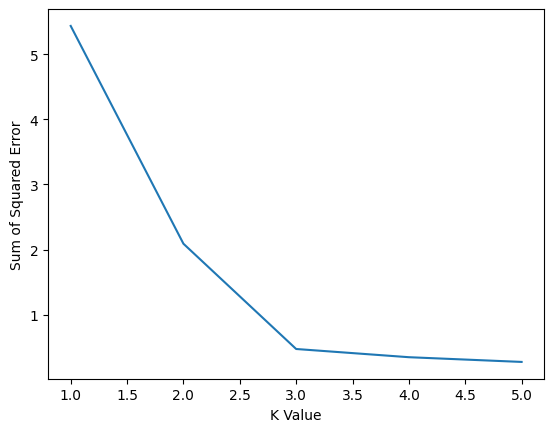

In [57]:
# Elbow plotting

plt.xlabel('K Value')
plt.ylabel('Sum of Squared Error')
plt.plot(range(1, 6), sse)